In [16]:
import seaborn as sns
import numpy as np
import skimage.io
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.utils import np_utils


In [17]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [18]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
        if os.path.isdir(os.path.join(data_directory,d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        
        file_names = [os.path.join(label_directory,f)
                     for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

In [19]:
train_data_path = os.path.join(os.getcwd(),"data","training")
test_data_path = os.path.join(os.getcwd(),"data","testing")

In [20]:
images, labels = load_data(train_data_path)
test_images, test_labels = load_data(test_data_path)

In [21]:
test_images.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
test_labels.shape

In [22]:
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
test_labels.shape

(10000,)

In [25]:
train_images, validation_images, train_labels, validation_labels = train_test_split(images,
                                labels, train_size=0.9, test_size=0.1, random_state = 0)

In [26]:
print(train_images.shape,train_labels.shape,validation_images.shape,validation_labels.shape, test_images.shape,test_labels.shape)

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,) (10000, 28, 28) (10000,)


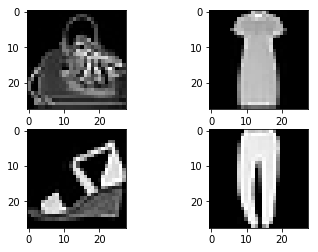

In [27]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [28]:
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],
num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],
num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [29]:
train_images.shape

(54000, 784)

In [30]:
num_pixels

784

In [31]:
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

In [32]:
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

In [33]:
num_classes

10

In [34]:
model = Sequential()
model.add(Dense(350, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(train_images, train_labels,
validation_data=(validation_images,validation_labels), epochs=5)
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 15s 271us/step - loss: 0.4876 - acc: 0.8274 - val_loss: 0.3816 - val_acc: 0.8638
Epoch 2/5
54000/54000 [==============================] - 15s 283us/step - loss: 0.3618 - acc: 0.8689 - val_loss: 0.4030 - val_acc: 0.8477
Epoch 3/5
54000/54000 [==============================] - 15s 287us/step - loss: 0.3279 - acc: 0.8799 - val_loss: 0.3450 - val_acc: 0.8755
Epoch 4/5
54000/54000 [==============================] - 15s 275us/step - loss: 0.2998 - acc: 0.8888 - val_loss: 0.3081 - val_acc: 0.8863
Epoch 5/5
54000/54000 [==============================] - 15s 278us/step - loss: 0.2798 - acc: 0.8969 - val_loss: 0.3206 - val_acc: 0.8828


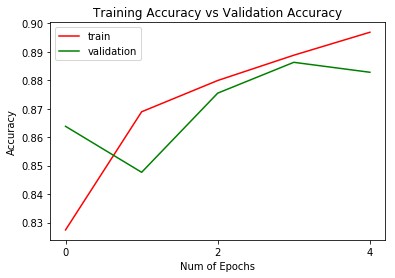

In [36]:
plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

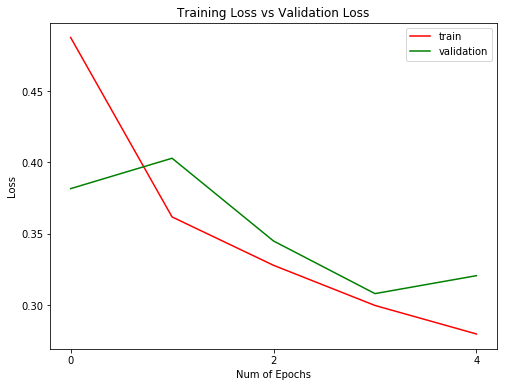

In [37]:
plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [38]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 12.31%
MLP Accuracy on test set: 87.69%


In [39]:
images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images/255
temp_labels = labels
labels = np_utils.to_categorical(labels)

In [40]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cv_acc = []
cv_error = []

In [41]:
for train, test in kfold.split(images, temp_labels):
 # create model
 model = Sequential()
 model.add(Dense(350, input_dim=num_pixels, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])

In [42]:
 # Fit the model
 model.fit(images[train], labels[train], epochs=1, verbose=0)
 # evaluate the model
 scores = model.evaluate(images[test], labels[test], verbose=0)
 print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 cv_acc.append(scores[1] * 100)
 cv_error.append(100-scores[1] * 100)

acc: 85.05%


In [43]:
print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),
np.std(cv_acc)))
print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),
np.std(cv_error)))


Cross Validation Accuracy 85.05% (+/- 0.00%)
Cross Validation Error 14.95% (+/- 0.00%)


In [44]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 16.29%
MLP Accuracy on test set: 83.71%


In [45]:
import random
image_index = random.randint(0,test_images.shape[0])
random_image = test_images[image_index]
random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)


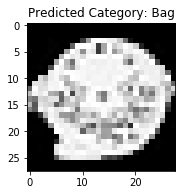

In [46]:
plt.subplot(221)
plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title("Predicted Category: "+label_dict[random_label[0]])
plt.show()